<div class="alert alert-info">
Привет, Андрей! Меня зовут Светлана и я буду проверять твой проект. Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе. Предлагаю общаться на «ты». Но если это не удобно - дай знать, и мы перейдем на «вы».

<div class="alert alert-success">
<b>👍 Успех:</b> Зелёным цветом отмечены удачные и элегантные решения, на которые можно опираться в будущих проектах.
</div>
<div class="alert alert-warning">
<b>🤔 Рекомендация:</b> Жёлтым цветом выделено то, что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас (однако это не обязательно).
</div>
<div class="alert alert-danger">
<b>😔 Необходимо исправить:</b> Красным цветом выделены комментарии, без исправления которых, я не смогу принять проект :(
</div>
<div class="alert alert-info">
<b>👂 Совет:</b> Какие-то дополнительные материалы
</div>
Давай работать над проектом в диалоге: если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом.
Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> Например, вот так.</div>
Пожалуйста, не перемещай, не изменяй и не удаляй мои комментарии. Всё это поможет выполнить повторную проверку твоего проекта быстрее.
 </div>

# Описание проекта: телекоммуникации

**Общая информация**

Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

Оператор предоставляет два основных типа услуг: 
* Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно;
* Интернет. Подключение может быть двух типов: через телефонную линию (DSL, от англ. digital subscriber line, «цифровая абонентская линия») или оптоволоконный кабель (Fiber optic).

Также доступны такие услуги:
* Интернет-безопасность: антивирус (DeviceProtection) и блокировка небезопасных сайтов (OnlineSecurity);
* Выделенная линия технической поддержки (TechSupport);
* Облачное хранилище файлов для резервного копирования данных (OnlineBackup);
* Стриминговое телевидение (StreamingTV) и каталог фильмов (StreamingMovies).
* За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.

**Описание данных**

Данные состоят из файлов, полученных из разных источников:
* contract_new.csv — информация о договоре;
* personal_new.csv — персональные данные клиента;
* internet_new.csv — информация об интернет-услугах;
* phone_new.csv — информация об услугах телефонии.

Во всех файлах столбец customerID содержит код клиента.
Информация о договорах актуальна на 1 февраля 2020.

**Цели и задачи проекта**

Основной целью проекта является прогнозирование оттока клиентов. В ходе достижения данной цели будут решены следующие задачи:
* Анализ и предобработка данных: необходимо провести исследовательский анализ данных и выявить возможные проблемы (например, отсутствующие значения) и исправить их. Также требуется преобразовать категориальные признаки в числовые, если это необходимо для обучения моделей машинного обучения.

* Создание модели машинного обучения: необходимо выбрать модель машинного обучения (например, логистическую регрессию, случайный лес, градиентный бустинг и так далее) и настроить ее параметры для достижения наилучшего значения целевой метрики.

* Интерпретация результатов работы наилучшей модели.

<div class="alert alert-danger">
<s><b>😔 Необходимо исправить:</b> Описательная часть получилась очень компактной, в нее нужно добавить цели и задачи проекта, как будет определено, что цели достигнуты? Это важная часть проекта и такой навык обязательно пригодится тебе в будущем</s>
</div>

<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> Дополнил</div>

 <div class="alert alert-success">
 <b>👍 Успех:</b> Все верно!
 </div>

## Исследовательский анализ данных

In [1]:
!pip install phik
import phik

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from re import sub

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, GridSearchCV
from catboost import CatBoostClassifier
from sklearn.metrics import 

from sklearn.preprocessing import StandardScaler

RANDOM_STATE = 12345

def plot_roc_curve(target_test, predictions):
    print('ROC-AUC score', roc_auc_score(target_test, predictions))
    
    fpr, tpr, thresholds = roc_curve(target_test, predictions)

    plt.figure(figsize=(11, 5))
    
    plt.plot(fpr, tpr)
    
    plt.plot([0, 1], [0, 1], linestyle='--')
    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    plt.title('ROC-кривая')
    
    plt.show()

Импорт необходимых библиотек.

In [2]:
try:
    contract_data = pd.read_csv('contract_new.csv')
    personal_data = pd.read_csv('personal_new.csv')
    internet_data = pd.read_csv('internet_new.csv')
    phone_data = pd.read_csv('phone_new.csv')
    
except FileNotFoundError:
    contract_data = pd.read_csv('/datasets/contract_new.csv')
    personal_data = pd.read_csv('/datasets/personal_new.csv')
    internet_data = pd.read_csv('/datasets/internet_new.csv')
    phone_data = pd.read_csv('/datasets/phone_new.csv')

<div class="alert alert-danger">
    <s><b>😔 Необходимо исправить:</b> Данные должны считываться не только локально</s>
</div>

<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> Исправил.</div>

 <div class="alert alert-success">
 <b>👍 Успех:</b> Все верно!
 </div>

Загрузка данных.

In [3]:
def view_data(df):
    print('Общий вид датафрейма:')
    display(df.head())
    print('Описательная статистика:')
    display(df.describe())
    print('Информация о датафрейме:')
    display(df.info())
    print('Количество пропусков:')
    display(df.isna().sum())

Функция для вывода общей информация о датасете.

In [4]:
def snake_case(s):
    return '_'.join(
        sub('([A-Z][a-z]+)', r' \1',
        sub('([A-Z]+)', r' \1',
        s.replace('-', ' '))).split()).lower()

Функция для преобразования названия столбца в snake_case

### Информация о договоре

In [5]:
view_data(contract_data)

Общий вид датафрейма:


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5


Описательная статистика:


,MonthlyCharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


Информация о датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


None

Количество пропусков:


customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

**Вывод**:
* В данных нет пропусков;
* Названия столбцов желательно привести к snake_case;
* Столбцы BeginDate и EndDate необходимо конвертировать в datetime;
* В случае, если значение в EndDate равняется No, необходимо его заменить на 01.02.2020 (так как клиент до сих пор пользуется услугами);
* TotalCharges нужно конвертировать в float64;
* К столбцам Type, PaperlessBilling и PaymentMethod необходимо применить OHE;

### Персональные данные клиента

In [6]:
view_data(personal_data)

Общий вид датафрейма:


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


Описательная статистика:


,SeniorCitizen
count,7043.000000
mean,0.162147
std,0.368612
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


Информация о датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


None

Количество пропусков:


customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64

**Вывод**:
* В данных нет пропусков;
* Названия столбцов желательно привести к snake_case;
* К столбцам Gender, Partner и Dependents необходимо применить OHE;

### Информация об интернет-услугах

In [7]:
view_data(internet_data)

Общий вид датафрейма:


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


Описательная статистика:


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,8824-RWFXJ,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785


Информация о датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


None

Количество пропусков:


customerID          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

**Вывод**:
* В данных нет пропусков;
* Названия столбцов желательно привести к snake_case;
* Ко всем столбцам, кроме customerID, необходимо применить OHE;

### Информация об услугах телефонии

In [8]:
view_data(phone_data)

Общий вид датафрейма:


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


Описательная статистика:


,customerID,MultipleLines
count,6361,6361
unique,6361,2
top,8824-RWFXJ,No
freq,1,3390


Информация о датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


None

Количество пропусков:


customerID       0
MultipleLines    0
dtype: int64

**Вывод**:
* В данных нет пропусков;
* Названия столбцов желательно привести к snake_case;
* К столбцу MultipleLines необходимо применить OHE;

### Вопросы

* Какую метрику использовать для оценки моделей?
* Какое знчение целевой метрики является удовлетворительным?

 <div class="alert alert-warning">
 <b>🤔 Рекомендация:</b> Основная метрика ROC-AUC не ниже 0,85, дополнительная метрика accuracy
</div>

<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> Здесь что-то нужно исправить?</div>

 <div class="alert alert-warning">
 Это был ответ на вопрос, извини, не в тот цвет раскрасила

### План работы

* **Предобработка данных на основе полученной информации**.

Переименование столбцов к snake_case. Объединение данных из разных файлов, путем сопоставления их по общему идентификатору клиента.

* **Изучение данных**. 

Более детальный анализ данных в каждом из приложенных файлов. Выделение важных признаков и удаление ненужных.

* **Подбор лучшей модели**. 

Преобразование категориальных признаков в числовые при помощи техники кодирования OHE. Построение нескольких моделей машинного обучения, таких как логистическая регрессия, случайный лес или градиентный бустинг. Настройка гиперпараметров моделей для достижения наилучшего результата. Сравнение их производительности на основе целевой метрики оценивания. 
* **Вывод**.

Анализ полученных результатов, подведение итогов работы, описание возникших сложностей и проблем.

<div class="alert alert-danger">
    <s><b>😔 Необходимо исправить:</b> План должен быть более подробным</s>
</div>

<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> Исправил</div>

 <div class="alert alert-success">
 <b>👍 Успех:</b> План принят!
 </div>

## Предобработка данных

In [9]:
contract_data.rename(columns=snake_case, inplace=True)
list(contract_data.columns)

['customer_id',
 'begin_date',
 'end_date',
 'type',
 'paperless_billing',
 'payment_method',
 'monthly_charges',
 'total_charges']

In [10]:
personal_data.rename(columns=snake_case, inplace=True)
list(personal_data.columns)

['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents']

In [11]:
internet_data.rename(columns=snake_case, inplace=True)
list(internet_data.columns)

['customer_id',
 'internet_service',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies']

In [12]:
phone_data.rename(columns=snake_case, inplace=True)
list(phone_data.columns)

['customer_id', 'multiple_lines']

Приведение названий столбцов датафреймов к snake_case.

In [13]:
contract_data['churn'] = (contract_data['end_date'] != 'No').astype(int)
contract_data.head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04,0
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84,0
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17,0
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6,0
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5,0


 <div class="alert alert-success">
 <b>👍 Успех:</b> Все верно!
 </div>

Добавление целевого признака churn. Если пользователь закончил пользоваться услугами, целевой признак равен одному, иначе - нулю.

In [14]:
contract_data['end_date'] = contract_data['end_date'].replace(['No'], ['2020-02-01'])
contract_data.head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,31.04,0
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,2071.84,0
2,3668-QPYBK,2019-10-01,2020-02-01,Month-to-month,Yes,Mailed check,53.85,226.17,0
3,7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1960.6,0
4,9237-HQITU,2019-09-01,2020-02-01,Month-to-month,Yes,Electronic check,70.70,353.5,0


Заменяем значения в столбце end_date на дату '2020-02-01', если пользователь не закончил пользоваться услугами.

In [15]:
for col in ['begin_date', 'end_date']:
    contract_data[col] = pd.to_datetime(contract_data[col], format='%Y-%m-%d')

contract_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           7043 non-null   datetime64[ns]
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7043 non-null   object        
 8   churn              7043 non-null   int64         
dtypes: datetime64[ns](2), float64(1), int64(1), object(5)
memory usage: 495.3+ KB


 <div class="alert alert-success">
 <b>👍 Успех:</b> Все верно!
 </div>

Конвертация begin_date и end_date в datetime.

In [16]:
contract_data['total_days'] = (contract_data['end_date'] - contract_data['begin_date']).dt.days

Новый признак total_days, показывающий то, сколько человек пользовался услугами оператора.

 <div class="alert alert-success">
 <b>👍 Успех:</b> Все верно! Но нужно смотреть на данные, что бы убедиться, что все олучается верно
 </div>

In [17]:
contract_data['total_charges'] = pd.to_numeric(contract_data['total_charges'], errors ='coerce')
contract_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           7043 non-null   datetime64[ns]
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7032 non-null   float64       
 8   churn              7043 non-null   int64         
 9   total_days         7043 non-null   int64         
dtypes: datetime64[ns](2), float64(2), int64(2), object(4)
memory usage: 550.4+ KB


Приведение столбца total_charges к числовому типу.

In [18]:
contract_data.isnull().sum()

customer_id           0
begin_date            0
end_date              0
type                  0
paperless_billing     0
payment_method        0
monthly_charges       0
total_charges        11
churn                 0
total_days            0
dtype: int64

После приведения к числовому типу появились пропуски.

In [19]:
contract_data[contract_data['total_charges'].isnull()]

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,churn,total_days
488,4472-LVYGI,2020-02-01,2020-02-01,Two year,Yes,Bank transfer (automatic),52.55,NaN,0,0
753,3115-CZMZD,2020-02-01,2020-02-01,Two year,No,Mailed check,20.25,NaN,0,0
936,5709-LVOEQ,2020-02-01,2020-02-01,Two year,No,Mailed check,80.85,NaN,0,0
1082,4367-NUYAO,2020-02-01,2020-02-01,Two year,No,Mailed check,25.75,NaN,0,0
1340,1371-DWPAZ,2020-02-01,2020-02-01,Two year,No,Credit card (automatic),56.05,NaN,0,0
3331,7644-OMVMY,2020-02-01,2020-02-01,Two year,No,Mailed check,19.85,NaN,0,0
3826,3213-VVOLG,2020-02-01,2020-02-01,Two year,No,Mailed check,25.35,NaN,0,0
4380,2520-SGTTA,2020-02-01,2020-02-01,Two year,No,Mailed check,20.00,NaN,0,0
5218,2923-ARZLG,2020-02-01,2020-02-01,One year,Yes,Mailed check,19.70,NaN,0,0
6670,4075-WKNIU,2020-02-01,2020-02-01,Two year,No,Mailed check,73.35,NaN,0,0


Пропуски в строках, где пользователь подключен всего-лишь один день. Заменим пропуски в столбце total_charges на нули.

 <div class="alert alert-success">
 <b>👍 Успех:</b> Все верно!
 </div>

In [20]:
contract_data['total_charges'] = contract_data['total_charges'].fillna(0)
contract_data.isnull().sum()

customer_id          0
begin_date           0
end_date             0
type                 0
paperless_billing    0
payment_method       0
monthly_charges      0
total_charges        0
churn                0
total_days           0
dtype: int64

In [21]:
churn_data = contract_data \
    .merge(personal_data, how='left', on='customer_id') \
    .merge(internet_data, how='left', on='customer_id') \
    .merge(phone_data, how='left', on='customer_id') 

Соединяем датафреймы по столбцу customer_id.

In [22]:
churn_data = churn_data.set_index('customer_id')
view_data(churn_data)

Общий вид датафрейма:


,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,churn,total_days,gender,...,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
customer_id,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,31.04,0,31,Female,...,Yes,No,DSL,No,Yes,No,No,No,No,NaN
5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,2071.84,0,1036,Male,...,No,No,DSL,Yes,No,Yes,No,No,No,No
3668-QPYBK,2019-10-01,2020-02-01,Month-to-month,Yes,Mailed check,53.85,226.17,0,123,Male,...,No,No,DSL,Yes,Yes,No,No,No,No,No
7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1960.60,0,1371,Male,...,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
9237-HQITU,2019-09-01,2020-02-01,Month-to-month,Yes,Electronic check,70.70,353.50,0,153,Female,...,No,No,Fiber optic,No,No,No,No,No,No,No


Описательная статистика:


,monthly_charges,total_charges,churn,total_days,senior_citizen
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,64.761692,2115.312885,0.156325,898.555729,0.162147
std,30.090047,2112.742814,0.363189,683.130510,0.368612
min,18.250000,0.000000,0.000000,0.000000,0.000000
25%,35.500000,436.750000,0.000000,276.000000,0.000000
50%,70.350000,1343.350000,0.000000,761.000000,0.000000
75%,89.850000,3236.690000,0.000000,1461.000000,0.000000
max,118.750000,9221.380000,1.000000,2314.000000,1.000000


Информация о датафрейме:
<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   begin_date         7043 non-null   datetime64[ns]
 1   end_date           7043 non-null   datetime64[ns]
 2   type               7043 non-null   object        
 3   paperless_billing  7043 non-null   object        
 4   payment_method     7043 non-null   object        
 5   monthly_charges    7043 non-null   float64       
 6   total_charges      7043 non-null   float64       
 7   churn              7043 non-null   int64         
 8   total_days         7043 non-null   int64         
 9   gender             7043 non-null   object        
 10  senior_citizen     7043 non-null   int64         
 11  partner            7043 non-null   object        
 12  dependents         7043 non-null   object        
 13  internet_service   5517 non-

None

Количество пропусков:


begin_date              0
end_date                0
type                    0
paperless_billing       0
payment_method          0
monthly_charges         0
total_charges           0
churn                   0
total_days              0
gender                  0
senior_citizen          0
partner                 0
dependents              0
internet_service     1526
online_security      1526
online_backup        1526
device_protection    1526
tech_support         1526
streaming_tv         1526
streaming_movies     1526
multiple_lines        682
dtype: int64

Пропуски в указанных столбцах выше обусловены тем, что, скорее всего, данные услуги не подключены. Заменим пропуски на 'No'.

 <div class="alert alert-success">
 <b>👍 Успех:</b> Все верно!
 </div>

In [23]:
for column in ('internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'multiple_lines'):
    churn_data[column] = churn_data[column].fillna('No')
    
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   begin_date         7043 non-null   datetime64[ns]
 1   end_date           7043 non-null   datetime64[ns]
 2   type               7043 non-null   object        
 3   paperless_billing  7043 non-null   object        
 4   payment_method     7043 non-null   object        
 5   monthly_charges    7043 non-null   float64       
 6   total_charges      7043 non-null   float64       
 7   churn              7043 non-null   int64         
 8   total_days         7043 non-null   int64         
 9   gender             7043 non-null   object        
 10  senior_citizen     7043 non-null   int64         
 11  partner            7043 non-null   object        
 12  dependents         7043 non-null   object        
 13  internet_service   7043 non-null   object        
 14

## Изучение данных

In [24]:
numeric_features = [
    'monthly_charges', 
    'total_charges', 
    'total_days'
]

categorical_features = [
    'type',
    'paperless_billing',
    'payment_method',
    'gender',
    'senior_citizen',
    'partner',
    'dependents',
    'internet_service', 
    'online_security', 
    'online_backup', 
    'device_protection', 
    'tech_support', 
    'streaming_tv', 
    'streaming_movies', 
    'multiple_lines',
]

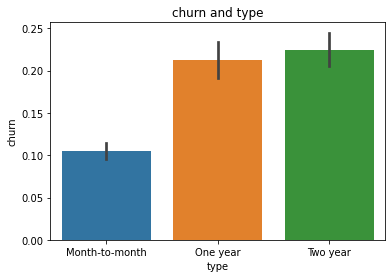

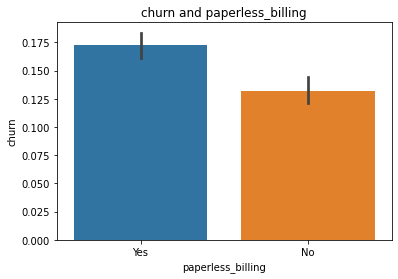

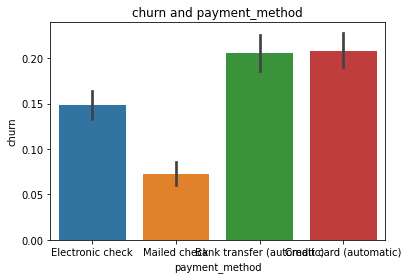

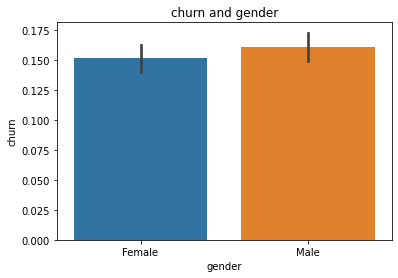

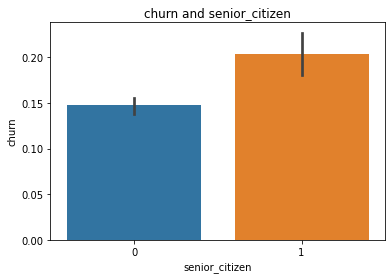

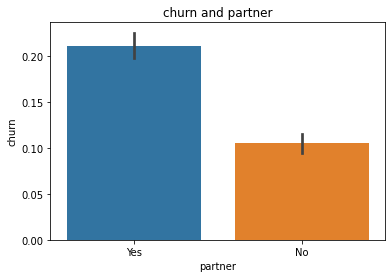

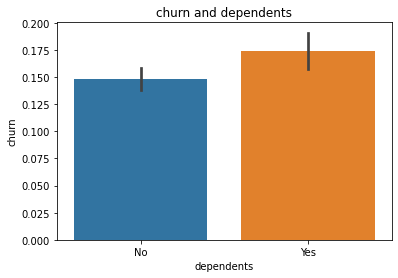

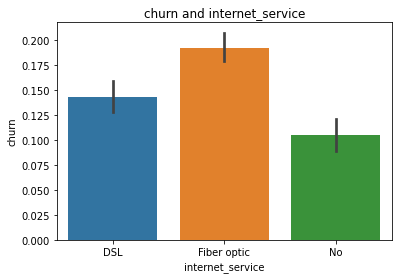

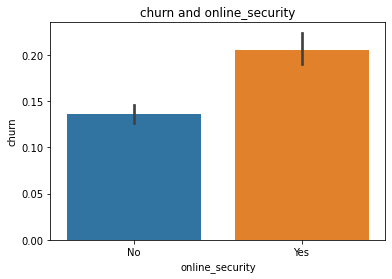

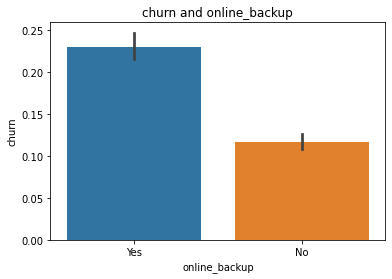

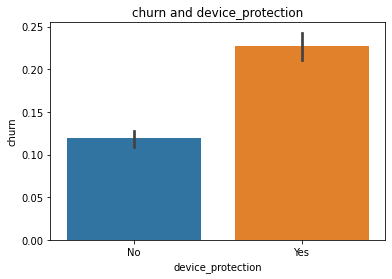

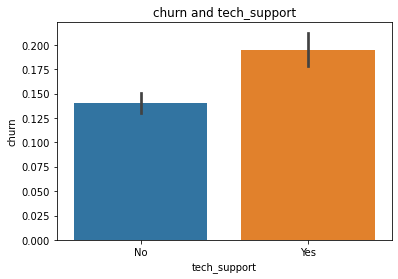

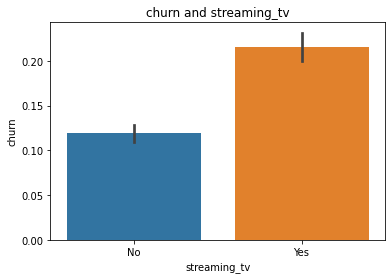

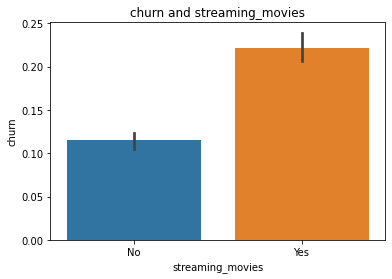

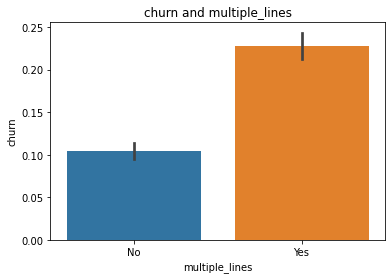

In [25]:
for feature in categorical_features:
    sns.barplot(x=feature, y='churn', data=churn_data)
    plt.xlabel(feature)
    plt.ylabel('churn')
    plt.title(f'churn and {feature}')
    plt.show()

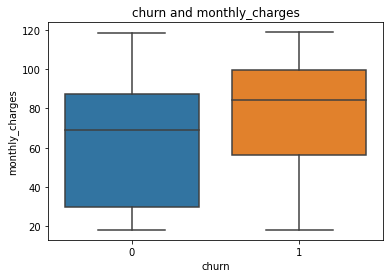

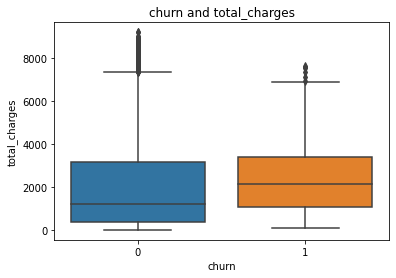

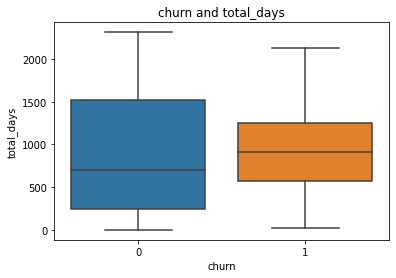

In [26]:
for feature in numeric_features:
    sns.boxplot(x='churn', y=feature, data=churn_data)
    plt.xlabel('churn')
    plt.ylabel(feature)
    plt.title(f'churn and {feature}')
    plt.show()

In [27]:
churn_data[numeric_features].corr()

,monthly_charges,total_charges,total_days
monthly_charges,1.000000,0.630440,0.220054
total_charges,0.630440,1.000000,0.821746
total_days,0.220054,0.821746,1.000000


Заметна мультиколлинеарность в данных - корреляция между total_charges и total_days - 0.82. Удалим столбец total_charges.

In [28]:
del churn_data['total_charges']
del numeric_features[1]

 <div class="alert alert-danger">
    <s><b>😔 Необходимо исправить:</b> Нужно посмотреть корреляцию</s>
 </div> 

<div class="alert alert-danger">
<s><b>😔 Необходимо исправить V2:</b> Молодец, что помнишь, что корреляция Пирсона подходит только для численных данных, но нам нужно посмотреть корреляцию всех признаков, для этого есть другие способы, например, phik https://towardsdatascience.com/phik-k-get-familiar-with-the-latest-correlation-coefficient-9ba0032b37e7</s>
</div>

interval columns not set, guessing: ['monthly_charges', 'churn', 'total_days', 'senior_citizen']


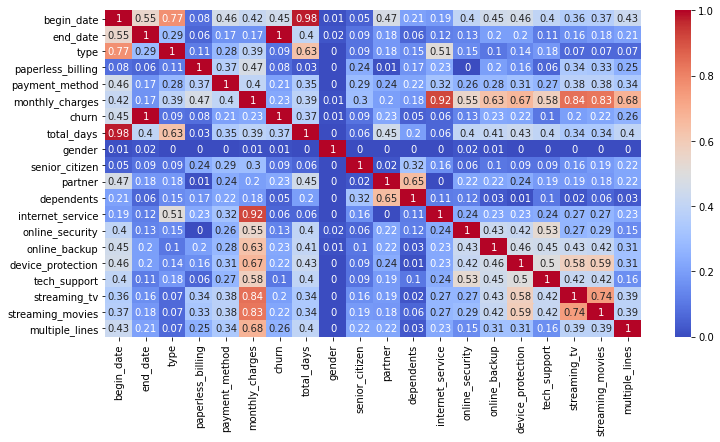

In [29]:
phik_matrix = churn_data.phik_matrix().round(2)
plt.figure(figsize=(12, 6))
sns.heatmap(phik_matrix, annot=True, cmap='coolwarm')
plt.show()

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

<div class="alert alert-warning">
<b>🤔 Рекомендация:</b> Здесь хочется видеть какие то выводы по корреляции
</div>

## Подбор модели

In [30]:
del churn_data['begin_date'], churn_data['end_date']

Удаление ненужных столбцов.

<div class="alert alert-warning">
<b>🤔 Рекомендация:</b> Все импорты должны быть в начале работы
</div>

In [31]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
features = churn_data.drop(columns=['churn'])
target = churn_data['churn']

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25, random_state=RANDOM_STATE)
encoder_ohe = OneHotEncoder(drop='first', handle_unknown='error', sparse=False)
encoder_ohe.fit(features_train[categorical_features])
features_train[encoder_ohe.get_feature_names()] = encoder_ohe.transform(features_train[categorical_features])
features_train = features_train.drop(categorical_features, axis=1)
scaler = StandardScaler()
features_train[numeric_features] = scaler.fit_transform(features_train[numeric_features])
features_train.head()

/tmp/ipykernel_404/2080959457.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_train[encoder_ohe.get_feature_names()] = encoder_ohe.transform(features_train[categorical_features])
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,monthly_charges,total_days,x0_One year,x0_Two year,x1_Yes,x2_Credit card (automatic),x2_Electronic check,x2_Mailed check,x3_Male,x4_1,...,x6_Yes,x7_Fiber optic,x7_No,x8_Yes,x9_Yes,x10_Yes,x11_Yes,x12_Yes,x13_Yes,x14_Yes
customer_id,,,,,,,,,,,,,,,,,,,,,
0422-OHQHQ,-1.475875,-0.656713,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6656-GULJQ,0.617064,1.886545,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
8967-SZQAS,-0.482560,-0.700714,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6711-VTNRE,0.749949,0.413978,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
5913-INRQV,0.836324,0.192506,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


 <div class="alert alert-danger">
 <s><b>😔 Необходимо исправить:</b> Кодирование проводится после разбиения на выборке с помощью OneHotEncoder подробно можно посмотреть здесь https://colab.research.google.com/drive/1_gAMXcQKoCShB_l8FNtYEejMnosm9mvt?usp=sharing#scrollTo=mobile-swift</s>
 </div>

<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> Почему я не могу использовать для этого get_dummies?</div>

<div class="alert alert-danger">
<s><b>😔 Необходимо исправить V2:</b> Кодирование нужно проводить после разбиения на выборки, это позволяет сделать тестовую выборку незнакомой для модели. get_dummies не запоминает информацию о признаках и если уникальные значения признака не совпадут, то в кодировании будет ошибка. Это можно проверить вручную после кодирования, но в  OneHotEncoder это все уже предусмотрено, подробней есть объяснение здесь https://colab.research.google.com/drive/1_gAMXcQKoCShB_l8FNtYEejMnosm9mvt?usp=sharing#scrollTo=young-layer</s>
</div>

Кодирование категориальных признаков методом OHE.

In [32]:
features_test[encoder_ohe.get_feature_names()] = encoder_ohe.transform(features_test[categorical_features])
features_test = features_test.drop(categorical_features, axis=1)
features_test[numeric_features] = scaler.transform(features_test[numeric_features])
features_test.head()

/tmp/ipykernel_404/1569238018.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_test[encoder_ohe.get_feature_names()] = encoder_ohe.transform(features_test[categorical_features])
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,monthly_charges,total_days,x0_One year,x0_Two year,x1_Yes,x2_Credit card (automatic),x2_Electronic check,x2_Mailed check,x3_Male,x4_1,...,x6_Yes,x7_Fiber optic,x7_No,x8_Yes,x9_Yes,x10_Yes,x11_Yes,x12_Yes,x13_Yes,x14_Yes
customer_id,,,,,,,,,,,,,,,,,,,,,
0098-BOWSO,-1.514079,-0.121368,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9992-RRAMN,0.668557,-1.016055,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
8380-PEFPE,0.221731,-1.102590,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9773-PEQBZ,0.494145,-0.878185,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
8319-QBEHW,-0.831383,-0.165369,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


 <div class="alert alert-danger">
    <s><b>😔 Необходимо исправить:</b> test_size=0.25 </s>
 </div>


<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

 <div class="alert alert-danger">
    <s><b>😔 Необходимо исправить:</b> Нужно проверить, что получилось после масштабирования</s>
 </div>

<div class="alert alert-danger">
<s><b>😔 Необходимо исправить V2:</b> Наша метрика не чувствительна к дисбалансу, апсемплинг не нужен. После масштабирования и кодирования нужно проверить, что все прошло как мы и хотели</s>
</div>

**LogisticRegression**

In [33]:
lr_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

lr_model = LogisticRegression(solver='lbfgs', n_jobs=-1)

lr_search = GridSearchCV(lr_model, lr_param_grid, cv=5, scoring='roc_auc')
lr_search.fit(features_train, target_train)

print(f'Лучшие параметры: {lr_search.best_params_}')
print(f'Лучшее значение: {lr_search.best_score_}')

Лучшие параметры: {'C': 1000}
Лучшее значение: 0.750709001538315


<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

<div class="alert alert-danger">
<s><b>😔 Необходимо исправить V2:</b> Тестовая выборка не используется на этапе выбора лучшей модели, здень нужно использовать best_score_ (для всех моделей ниже это тоже нужно исправить) ROC-кривую строим только для лучшей модели на этапе проверки на тестовой выборке</s>
</div>

**CatBoostClassifier**

In [35]:
cb_param_grid = {
    'learning_rate': [0.1, 0.3],
    'iterations': [50, 100],
    'l2_leaf_reg': [3, 9]
}

cb_model = CatBoostClassifier(random_state=RANDOM_STATE, verbose=0)

cb_search = GridSearchCV(cb_model, cb_param_grid, cv=5, scoring='roc_auc')
cb_search.fit(features_train, target_train)

print(f'Лучшие параметры: {cb_search.best_params_}')
print(f'Лучшее значение: {cb_search.best_score_}')

Лучшие параметры: {'iterations': 100, 'l2_leaf_reg': 3, 'learning_rate': 0.3}
Лучшее значение: 0.8979019009579492


<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

**RandomForestClassifier**

In [37]:
rf_param_grid = {
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [2, 10],
    'n_estimators': [10, 50, 100], 
}

rf_model = RandomForestClassifier(random_state=RANDOM_STATE)

rf_search = GridSearchCV(rf_model, rf_param_grid, cv=5, scoring='roc_auc')
rf_search.fit(features_train, target_train)

print(f'Лучшие параметры: {rf_search.best_params_}')
print(f'Лучшее значение: {rf_search.best_score_}')

Лучшие параметры: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Лучшее значение: 0.8145349284158556


<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

 <div class="alert alert-danger">
    <s><b>😔 Необходимо исправить:</b> Ни одна модель не достигла необходимомго минимума по метрике</s>
 </div>

Лучшее значение целевой метрики показала модель CatBoost. Построим ROC-кривую. Узнаем важность признаков.

ROC-AUC score 0.9199379900579102


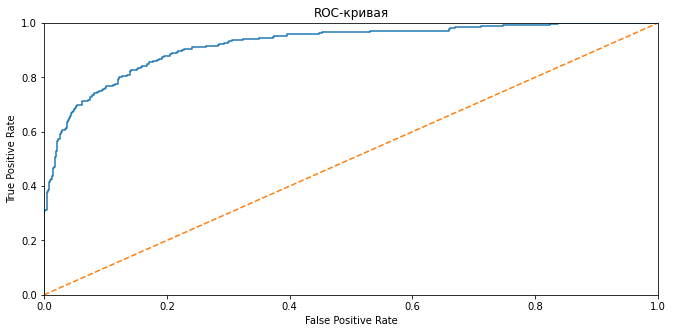

In [40]:
cb_predicted_probalities = cb_search.best_estimator_.predict_proba(features_test)[:, 1]
plot_roc_curve(target_test, cb_predicted_probalities)

In [39]:
imp = pd.DataFrame(cb_search.best_estimator_.feature_importances_, index = features_test.columns, columns=['importance'])
imp = imp.sort_values(by='importance', ascending=False)
imp

,importance
total_days,51.011924
monthly_charges,12.170539
x0_Two year,5.158011
x5_Yes,4.405082
x0_One year,4.186882
x14_Yes,2.692867
x9_Yes,2.439833
x2_Mailed check,2.050165
x4_1,1.981592
x1_Yes,1.581094


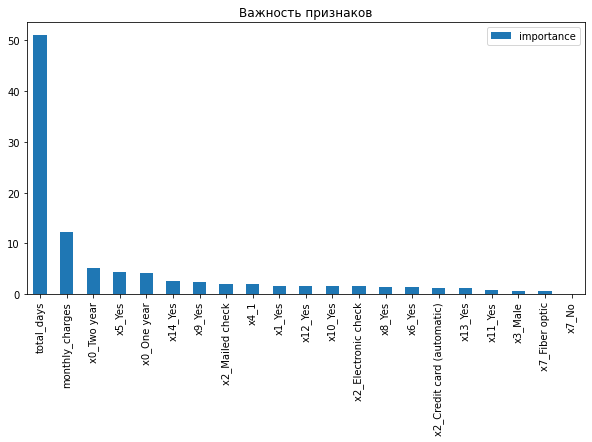

In [41]:
imp.plot(kind='bar', figsize=(10, 5), title='Важность признаков')
plt.show()

In [42]:
predicted_target = cb_search.best_estimator_.predict(features_test)
confusion_matrix(target_test, predicted_target)

array([[1474,   27],
       [ 129,  131]])

Матрица ошибок.

<div class="alert alert-danger">
<s><b>😔 Необходимо исправить V2:</b> Важность признаков нужно визуализировать, и построить матрицу ошибок</s>
</div>

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

## Вывод 

Были проанализированы предоставленные данные и по результатам анализа были приняты решения по дальнейшей обработки данных.
В процессе предобработки данных были ереименованы столбцы (snake_case), изменены типы данных.

Были добавлены два новых признака - целевой признак churn, который означает, отказался ли клиент от услуг, и признак total_days, означающий, сколько дней пользователь использует услуги провайдера.

Была проведена подготовка данных к обучению моделей машинного обучения: удалены ненужные столбцы, категориальные признаки закодированы техникой OHE, было проведено масштабирование количественных признаков и upsampling.

Затем на данных были обучены 3 модели: LogisticRegression, CatBoostClassifier и RandomForestClassifier.

Лучший результат целевой метрики показала модель CatBoostClassifier, равный 0.9114.

Самые важные факторы - total_days - длительность пользования услугами, и monthly_charges - оплата в месяц.

<div class="alert alert-success">
<b>👍 Успех:</b> Молодец, финальный проект завершен!  Сама работа получилась хорошей и структурированной, были предобработаны и проанализированы данные, выбран целевой признак, рассчеты подкреплены визуализацией, это очень важная часть работы, которая облегчает анализ и позволяет полнее представлять происходящее в данных. Построено и обучено несколько моделей, все они оценены и выбрана лучшая. Цель работы достигнута, получена модель хорошо предсказывающая уход клиентов. Не забывай о том, что все пункты очень важны и каждому стоит уделять максимум внимания. <p>
    Дополнительно предлагаю посмотреть:
- Книга от ШАД: https://academy.yandex.ru/handbook/ml

- Лекции от Andrew Ng: https://www.youtube.com/watch?v=PPLop4L2eGk&list=PLLssT5z_DsK-h9vYZkQkYNWcItqhlRJLN

- Открытый курс машинного обучения: https://habr.com/ru/company/ods/blog/322626/
</div>

<div class="alert alert-danger">
<b>😔 Необходимо исправить:</b> Отчет куда то пропал
</div>

## Отчет о проделанной работе

* В ходе работы над проектом были выполнены все пункты, описанные в первоначальном плане. Значение RANDOM_STATE для дальнейшей работы: 12345
* Возникли трудности с построением графика корелляции всех признаков датафрема, но данная проблема была успешно решена с помощью библиотеки *phik*. Также возникли трудности с корректным кодированием признаков методом OHE, тем не менее, проблема была решена - вместо *pd.get_dummies* использовался *OneHotEncoder*
* Ключевые шаги в решении задачи: анализ файлов, предобработка данных, исследовательский анализ, подбор параметров и обучение моделей.
* В ходе обучения модели категориальные признаки были закодированы методом OHE, также признаки *begin_date* и *end_date* были удалены.
* Лучшая модель: CatBoostClassifier. Ее параметры: {'iterations': 100, 'l2_leaf_reg': 3, 'learning_rate': 0.3}. Значение целевой метрики на обучающих данных: 0.898, на тестовых: 0.919

**Визуализация ROC-кривой**
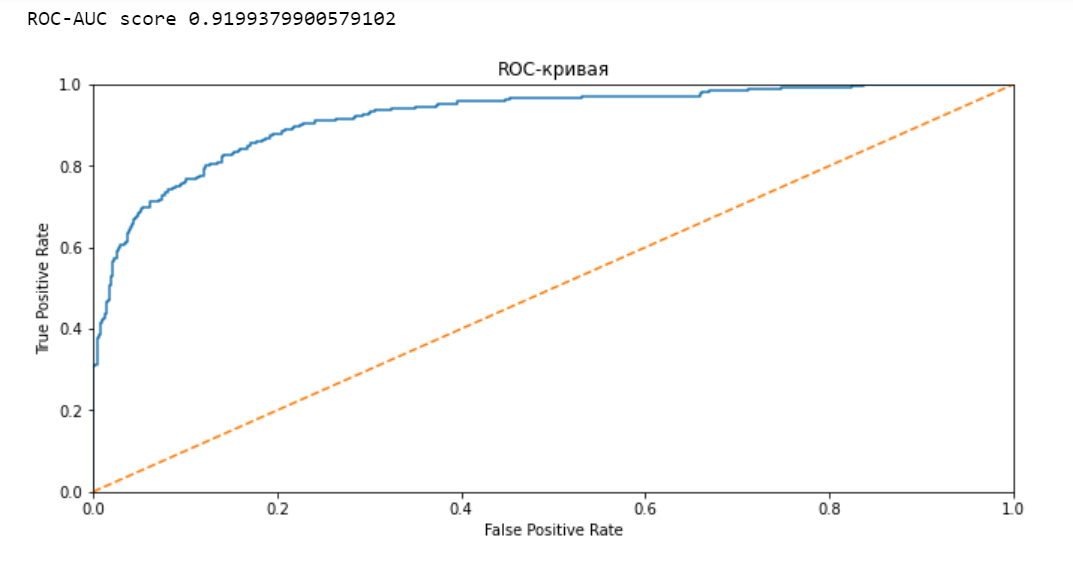

**Матрица ошибок**
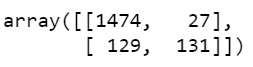

**Важность признаков**
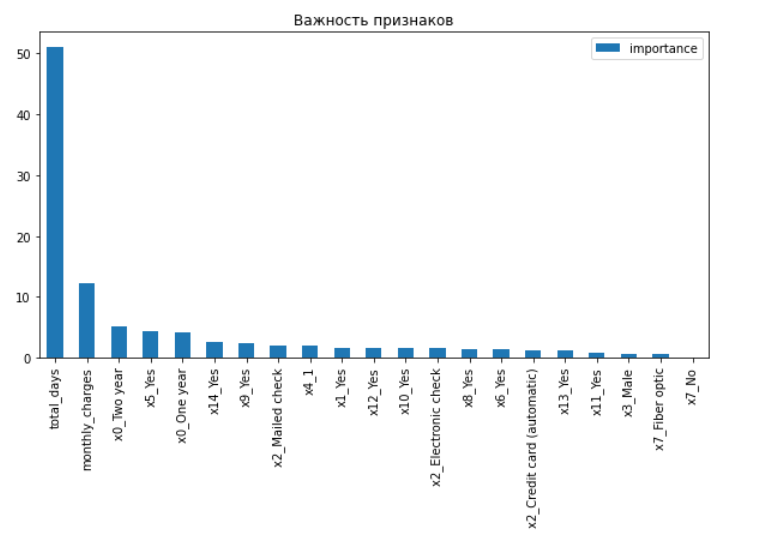

<div class="alert alert-danger">
<s><b>😔 Необходимо исправить:</b> Нужно добавить значение RANDOM_STATE, визуализации ROC-кривой, матрицы ошибок и важности признаков в виде картинок</s>
</div>

RANDOM_STATE добавил в текстовый отчет, картинки прикрепил.

<div class="alert alert-success">
<b>👍 Успех:</b> Хороший отчет, молодец! Поздравляю тебя с окончанием курса! <p>
    Немного пройдемся по твоей работе, получилася хороший структурированный проект, последовательно выполнены все этапы, очень важно уделять достаточно внимания предобработке данных, внимательно исследовать признаки, выбирать нужные и отбрасывать лишние, у тебя это получилось. <p>
    Было исследовано несколько моделей и выбрана лучшая, в отчете все подробно описано и проилюстрировано. Визуализация так же является очень важной частью работы, это позволяет легче видеть большее количество информации и упрощает принятие решений, делает различные сравнения более наглядными. С этой частью ты тоже хорошо справился.<p>
    С опытом становится значительно легче, но опыт это не только повторение однажды изученного, но и постоянное развитие, тем более, что ты выбрал очень динамично развивающуюся область. <p>
    В будущей профессии тебе точно пригодиться умение системно подходить к решению аналитических задач, здесь рекомендую изучить ТРИЗ и системный анализ, из литературы можно почитать Теоретический минимум по Big Data — Су Кеннет и Ын Анналин, Практическая статистика для специалистов Data Science — Брюс П. и Брюс Э., Real-World Machine Learning — Henric Brink, Joseph Мark, W. Richards Fetherolf, Прикладное машинное обучение с помощью Scikit-Learn и TensorFlow — Жерон Орельен.<p>
    Есть интересные сообщества (например https://vk.com/mashinnoe_obuchenie_ai_big_data) и конечно же https://habr.com/ru/all/<p>
    Удачи тебе и профессионального роста!

</div>